In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Station Data

In [ ]:
station_data = pd.read_csv('/content/station_data_29_11.csv')

In [ ]:
station_data.head()

,kwhTotal,ended,startTime,endTime,chargeTimeHrs,weekday,platform,stationId,locationId,managerVehicle,facilityType,reportedZip
0,7.05,0015-08-26 22:32:05,10,22,11.586944,Wed,ios,228137,503205,1,3,1
1,7.23,0015-06-10 21:12:05,10,21,10.488333,Wed,ios,228137,503205,1,3,1
2,6.47,0015-03-11 22:38:05,16,22,6.602778,Wed,android,653450,503205,0,3,0
3,7.00,0015-06-22 20:57:15,11,20,9.836944,Mon,ios,653450,503205,1,3,1
4,6.56,0015-07-16 21:22:06,12,21,9.320278,Thu,ios,386940,814002,1,2,1


In [ ]:
print(station_data.info())
print(station_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kwhTotal        3395 non-null   float64
 1   ended           3395 non-null   object 
 2   startTime       3395 non-null   int64  
 3   endTime         3395 non-null   int64  
 4   chargeTimeHrs   3395 non-null   float64
 5   weekday         3395 non-null   object 
 6   platform        3395 non-null   object 
 7   stationId       3395 non-null   int64  
 8   locationId      3395 non-null   int64  
 9   managerVehicle  3395 non-null   int64  
 10  facilityType    3395 non-null   int64  
 11  reportedZip     3395 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 318.4+ KB
None
          kwhTotal    startTime      endTime  chargeTimeHrs      stationId  \
count  3395.000000  3395.000000  3395.000000    3395.000000    3395.000000   
mean      5.809629    13.743446    16.

    locationId  kwhTotal
0       125372    305.56
1       144857   1010.98
2       202527    479.47
3       310085      6.67
4       399399    241.68
5       454147     23.15
6       461655   2096.62
7       481066   1658.65
8       493904   2805.86
9       503205    983.77
10      517854    629.85
11      566549    753.23
12      572514     13.36
13      620906    119.07
14      648339    319.18
15      700367     19.05
16      747048    284.92
17      751082    275.22
18      814002    628.26
19      868085   1948.03
20      878393    313.81
21      928191   1083.76
22      948590    504.22
23      976902   2572.93
24      978130    646.39


<ipython-input-16-0aa42245e30a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energy_by_location, x='locationId', y='kwhTotal', palette='viridis')


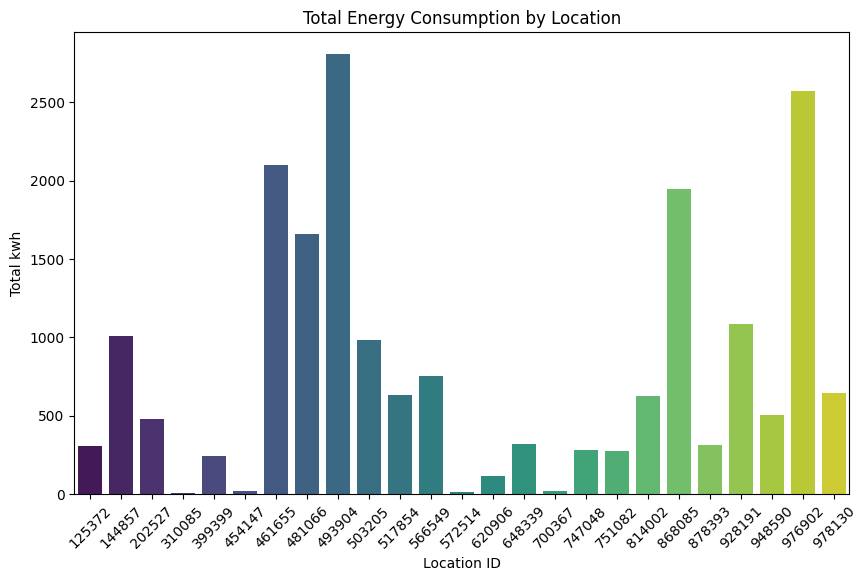

In [ ]:
# Total energy consumption by location
energy_by_location = station_data.groupby('locationId')['kwhTotal'].sum().reset_index()
print(energy_by_location)

# Visualization: Total energy consumption by location
plt.figure(figsize=(10,6))
sns.barplot(data=energy_by_location, x='locationId', y='kwhTotal', palette='viridis')
plt.title('Total Energy Consumption by Location')
plt.xlabel('Location ID')
plt.ylabel('Total kwh')
plt.xticks(rotation=45)
plt.show()

startTime
0       3
1       3
3       2
4       4
5       2
6       1
7       1
8      53
9     158
10    295
11    504
12    475
13    291
14    139
15    192
16    404
17    437
18    233
19    119
20     56
21     14
22      7
23      2
Name: count, dtype: int64


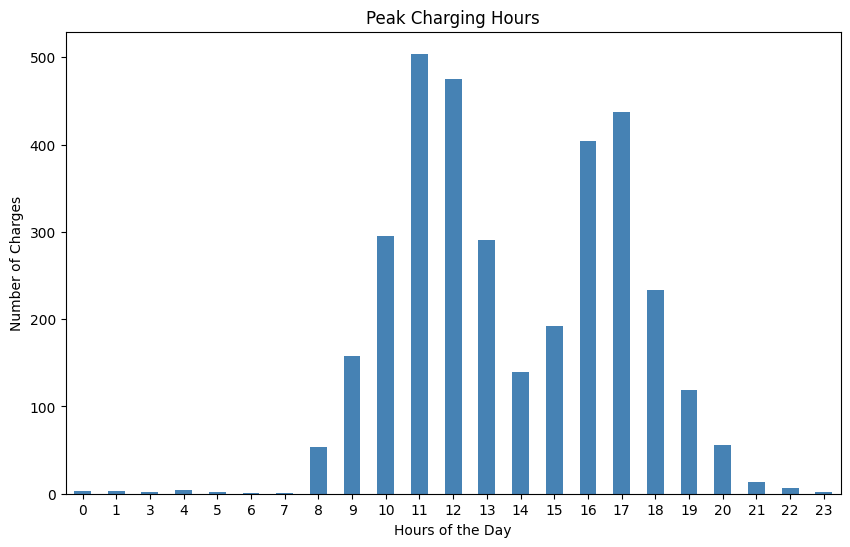

In [ ]:
#Peak charging hours
peak_hours = station_data['startTime'].value_counts().sort_index()
print(peak_hours)

#Visualization
plt.figure(figsize=(10,6))
peak_hours.plot(kind='bar', color='steelblue')
plt.title('Peak Charging Hours')
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Charges')
plt.xticks(rotation=0)
plt.show()

  weekday  chargeTimeHrs
0     Fri       2.763266
1     Mon       2.899101
2     Sat       2.297464
3     Sun       2.100394
4     Thu       2.789266
5     Tue       2.894809
6     Wed       2.937231


<ipython-input-5-dee60c29c999>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charge_weekday, x='weekday', y='chargeTimeHrs', palette='coolwarm')


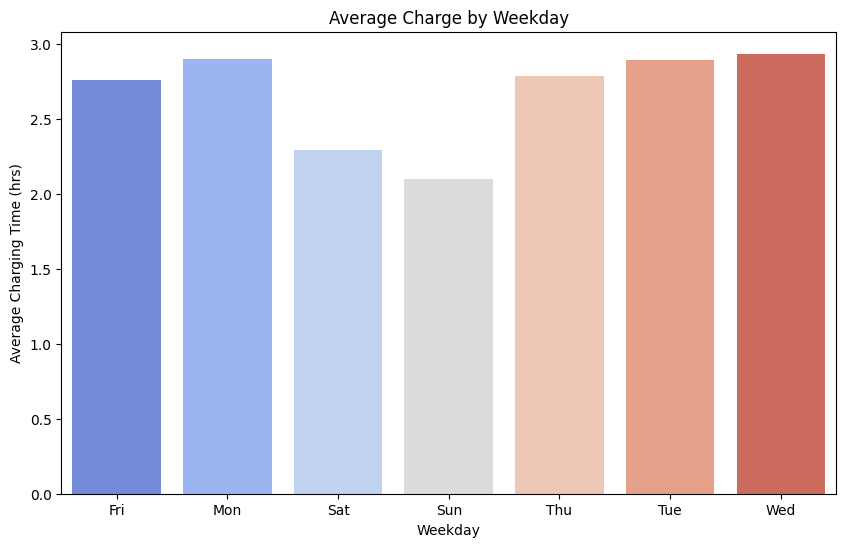

In [ ]:
#Average charging time by weekday
avg_charge_weekday = station_data.groupby('weekday')['chargeTimeHrs'].mean().reset_index()
print(avg_charge_weekday)

#Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=avg_charge_weekday, x='weekday', y='chargeTimeHrs', palette='coolwarm')
plt.title('Average Charge by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Charging Time (hrs)')
plt.show()

#Global EV Data

In [ ]:
global_ev_data = pd.read_csv('/content/global_ev_data_29_11.csv')

In [ ]:
global_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,China,Historical,Oil displacement Mbd,Vans,EV,2010,Milion barrels per day,0.00001
1,Europe,Historical,Oil displacement Mbd,Buses,EV,2010,Milion barrels per day,0.00010
2,Europe,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00010
3,Europe,Historical,Oil displacement Mbd,Buses,EV,2012,Milion barrels per day,0.00010
4,India,Historical,Oil displacement Mbd,Cars,EV,2017,Milion barrels per day,0.00010


In [ ]:
# Basic info and statistics
print(global_ev_data.info())
print(global_ev_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
None
               year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08


    year         value
0   2010  1.477092e+05
1   2011  3.926084e+05
2   2012  9.672729e+05
3   2013  1.786319e+06
4   2014  3.103426e+06
5   2015  5.739548e+06
6   2016  8.897600e+06
7   2017  1.357305e+07
8   2018  2.077615e+07
9   2019  2.733378e+07
10  2020  1.036460e+08
11  2021  1.738107e+08
12  2022  2.689576e+08
13  2023  3.927077e+08
14  2025  4.526501e+08
15  2030  1.296225e+09
16  2035  2.637279e+09


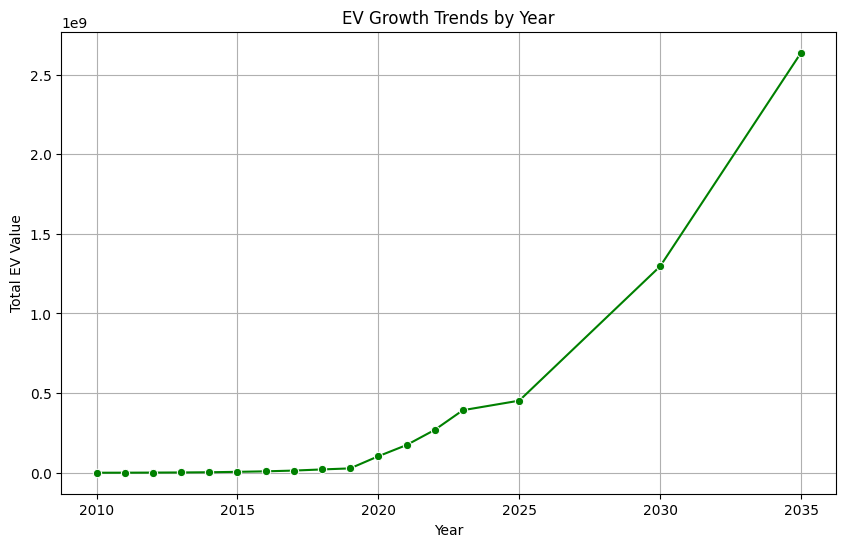

In [ ]:
# EV growth trends by year
growth_by_year = global_ev_data.groupby('year')['value'].sum().reset_index()
print(growth_by_year)

# Visualization: EV growth trends by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=growth_by_year, x='year', y='value', marker='o', color='green')
plt.title("EV Growth Trends by Year")
plt.xlabel("Year")
plt.ylabel("Total EV Value")
plt.grid()
plt.show()

In [ ]:
print(global_ev_data['value'].apply(lambda x:float(x)))

0        0.00001
1        0.00010
2        0.00010
3        0.00010
4        0.00010
          ...   
12649    0.10000
12650    0.10000
12651    0.10000
12652    0.09000
12653    0.03300
Name: value, Length: 12654, dtype: float64


                  region         value
0              Australia  5.917191e+05
1                Austria  9.156697e+05
2                Belgium  1.791753e+06
3                 Brazil  2.732338e+05
4               Bulgaria  4.636790e+03
5                 Canada  2.527226e+06
6                  Chile  1.738773e+04
7                  China  1.234572e+09
8               Colombia  1.603157e+04
9             Costa Rica  2.765728e+04
10               Croatia  7.572710e+03
11                Cyprus  2.277490e+03
12        Czech Republic  3.431612e+04
13               Denmark  1.167352e+06
14                  EU27  3.527300e+07
15               Estonia  4.605510e+03
16                Europe  6.134628e+08
17               Finland  7.813675e+05
18                France  7.189074e+06
19               Germany  1.057623e+07
20                Greece  1.152414e+05
21               Hungary  4.207123e+04
22               Iceland  1.944133e+05
23                 India  6.745700e+07
24             Indonesia 

<ipython-input-21-162b16bf7124>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_by_region, x='region', y='value', palette='plasma')


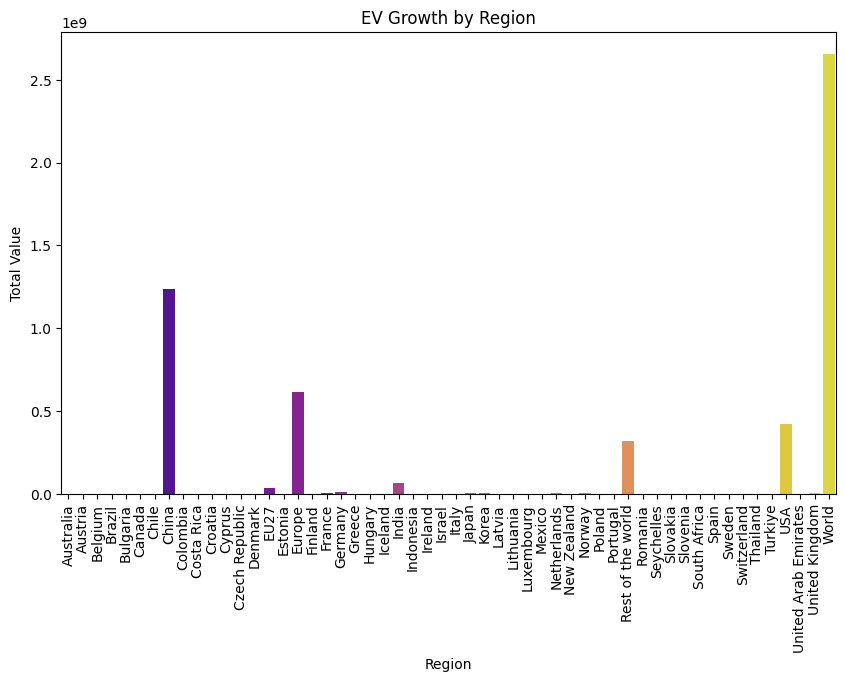

In [ ]:
#EV growth by region

growth_by_region = global_ev_data.groupby('region')['value'].sum().reset_index()
print(growth_by_region)

#Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=growth_by_region, x='region', y='value', palette='plasma')
plt.title('EV Growth by Region')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.show()

#Car Data

In [ ]:
# Load the dataset
car_data = pd.read_csv("/content/us_car_data_29_11.csv")



Model
MODEL 3        14011
LEAF           11042
MODEL S         6112
VOLT            4868
BOLT EV         3561
MODEL X         3267
PRIUS PRIME     2464
MODEL Y         2367
PACIFICA        2222
WRANGLER        2221
Name: count, dtype: int64


Model
MODEL 3        14011
LEAF           11042
MODEL S         6112
VOLT            4868
BOLT EV         3561
MODEL X         3267
PRIUS PRIME     2464
MODEL Y         2367
PACIFICA        2222
WRANGLER        2221
Name: count, dtype: int64


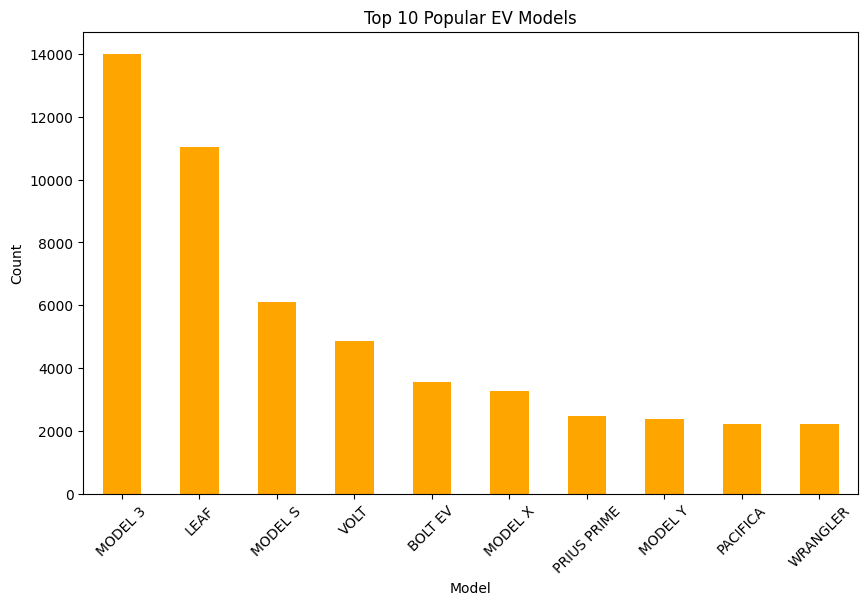

In [ ]:
# Most popular EV makes and models
popular_models = car_data['Model'].value_counts().head(10)
print(popular_models)


# Visualization: Top 10 popular EV models
plt.figure(figsize=(10, 6))
popular_models.plot(kind='bar', color='orange')
plt.title("Top 10 Popular EV Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


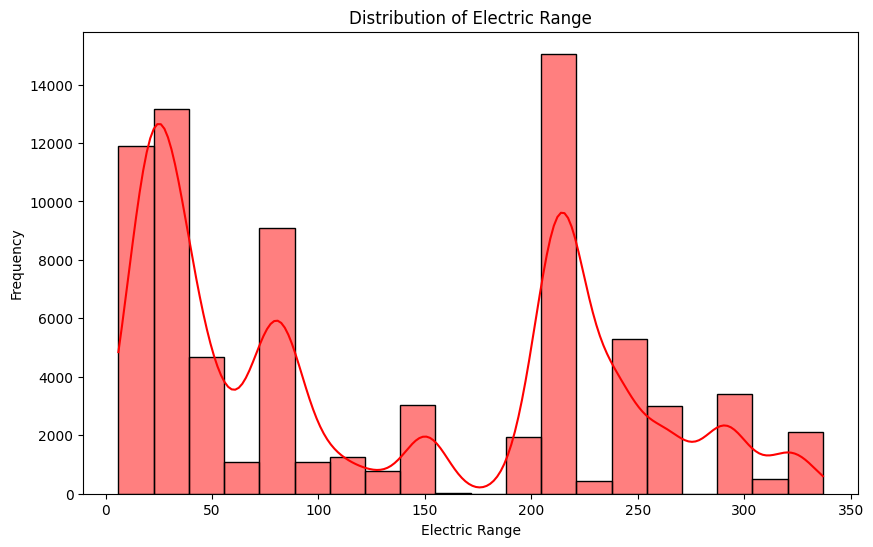

In [ ]:
# Electric Range distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Electric Range'], bins=20, kde=True, color='red')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()


County
King         39379
Snohomish     8038
Pierce        5997
Clark         4894
Thurston      3099
Kitsap        2852
Whatcom       2196
Spokane       2089
Benton        1080
Island         969
Name: count, dtype: int64


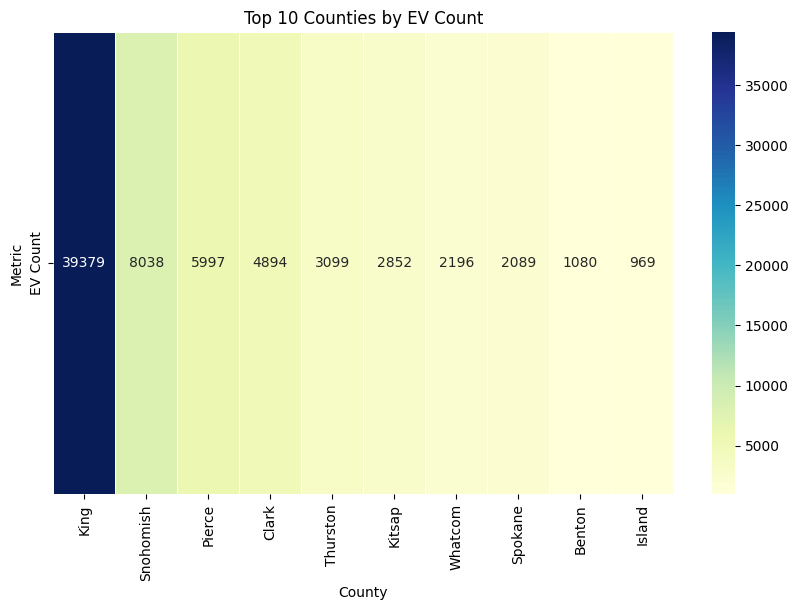

In [ ]:
# Geographic heatmap of EV adoption
ev_by_county = car_data['County'].value_counts().head(10)
print(ev_by_county)

# Visualization: EV adoption by county

# Convert the Series into a DataFrame for heatmap
heatmap_data = pd.DataFrame(ev_by_county).reset_index()
heatmap_data.columns = ['County', 'EV Count']

# Create a pivot table for the heatmap
heatmap_pivot = heatmap_data.set_index('County').T

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Top 10 Counties by EV Count")
plt.xlabel("County")
plt.ylabel("Metric")
plt.show()

#EV Population

In [ ]:
# Load the dataset
ev_population = pd.read_csv("/content/Electric_Vehicle_Population_Data_29_11.csv")


Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64


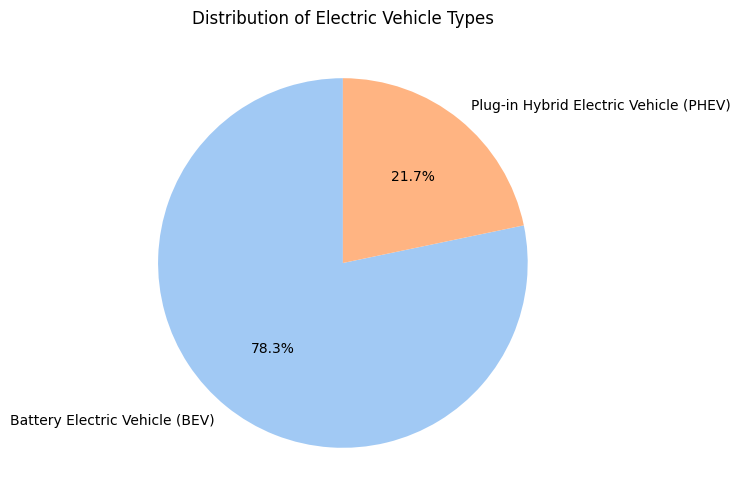

In [ ]:
# Count of vehicles by type
vehicle_types = ev_population['Electric Vehicle Type'].value_counts()
print(vehicle_types)

# Visualization: Vehicle types
plt.figure(figsize=(10, 6))
vehicle_types.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("")  # Hides the y-axis label
plt.show()

Legislative District
41.0    11553
45.0    10737
48.0     9817
1.0      7786
5.0      7614
11.0     7507
36.0     7389
46.0     6901
43.0     6524
37.0     5215
Name: count, dtype: int64


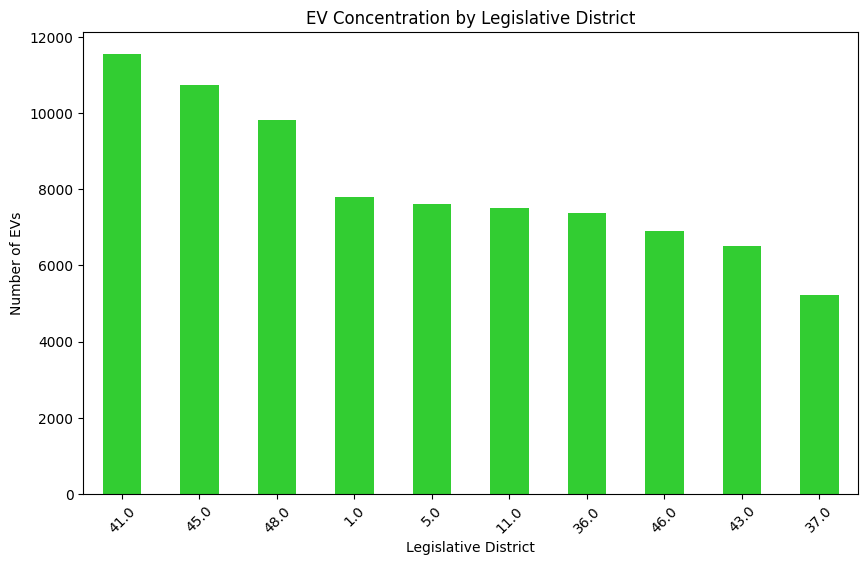

In [ ]:
# EV concentration by legislative district
district_data = ev_population['Legislative District'].value_counts().head(10)
print(district_data)

# Visualization: Legislative district concentration
plt.figure(figsize=(10, 6))
district_data.plot(kind='bar', color='limegreen')
plt.title("EV Concentration by Legislative District")
plt.xlabel("Legislative District")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()
